# MNIST Classification Using CNN

In [1]:
#importing the necessary modules
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    shear_range=0.1
)
train_datagen.fit(train_images)

val_datagen = ImageDataGenerator()

In [3]:
# Model architecture
model = models.Sequential([
    Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.35),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Training with data augmentation
batch_size = 128
epochs = 60

history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size),
    steps_per_epoch=len(train_images) // batch_size,
    epochs=epochs,
    validation_data=val_datagen.flow(test_images, test_labels, batch_size=batch_size),
    validation_steps=len(test_images) // batch_size,
    callbacks=[early_stop, lr_reduce],
    verbose=2
)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 - 37s - 78ms/step - accuracy: 0.8661 - loss: 0.4332 - val_accuracy: 0.7374 - val_loss: 0.9306 - learning_rate: 1.0000e-03
Epoch 2/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 - 1s - 1ms/step - accuracy: 0.9766 - loss: 0.0712 - val_accuracy: 0.7371 - val_loss: 0.9362 - learning_rate: 1.0000e-03
Epoch 3/60
468/468 - 27s - 57ms/step - accuracy: 0.9591 - loss: 0.1340 - val_accuracy: 0.9733 - val_loss: 0.0805 - learning_rate: 1.0000e-03
Epoch 4/60
468/468 - 1s - 1ms/step - accuracy: 0.9609 - loss: 0.0961 - val_accuracy: 0.9694 - val_loss: 0.0963 - learning_rate: 1.0000e-03
Epoch 5/60
468/468 - 41s - 88ms/step - accuracy: 0.9687 - loss: 0.1006 - val_accuracy: 0.9885 - val_loss: 0.0338 - learning_rate: 1.0000e-03
Epoch 6/60
468/468 - 0s - 1ms/step - accuracy: 0.9766 - loss: 0.0635 - val_accuracy: 0.9883 - val_loss: 0.0347 - learning_rate: 1.0000e-03
Epoch 7/60
468/468 - 21s - 44ms/step - accuracy: 0.9748 - loss: 0.0827 - val_accuracy: 0.9902 - val_loss: 0.0292 - learning_rate: 1.0000e-03
Epoch 8/60
468/468 - 1s - 1ms/step - accuracy: 0.9766 - loss: 0.0610 - val_accuracy: 0.9899 - val_loss: 0.0289 - learning_rate: 1.0000e-03
Epoch 9/60
468/468 - 20s - 44ms/


Test accuracy: 99.62%


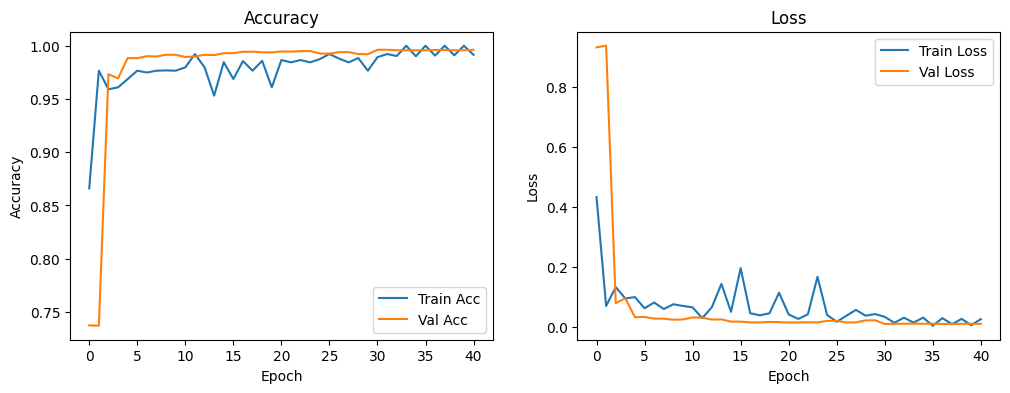

In [5]:
# Evaluate and plot
score = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest accuracy: {score[1] * 100:.2f}%")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 📊 Performance Report: CNN on MNIST Dataset

### Model & Training Setup

- **Dataset:** MNIST (Handwritten Digits - 28x28 grayscale images, 10 classes)
- **Model Type:** Convolutional Neural Network (CNN)
- **Key Layers:**
  - Conv2D + ReLU
  - MaxPooling2D
  - Flatten
  - Dense layers
- **Activation Function:** ReLU (Hidden layers), Softmax (Output)
- **Loss Function:** Categorical Crossentropy
- **Optimizer:** Adam
- **Batch Size:** 128
- **Epochs:** 60
- **Learning Rate:** 0.001 (constant)

---

### Training & Validation Accuracy Snapshot

| Epoch | Train Accuracy | Train Loss | Val Accuracy | Val Loss |
|-------|----------------|------------|--------------|----------|
| 1     | 86.61%         | 0.4332     | 73.74%       | 0.9306   |
| 2     | 97.66%         | 0.0712     | 73.71%       | 0.9362   |
| 3     | 95.91%         | 0.1340     | 97.33%       | 0.0805   |
| 5     | 96.87%         | 0.1006     | 98.85%       | 0.0338   |
| 7     | 97.48%         | 0.0827     | 99.02%       | 0.0292   |
| 9     | 97.68%         | 0.0769     | 99.15%       | 0.0255   |

> Note: Training alternated between fast and slow runs likely due to hardware or GPU availability in Google Colab.

---

### Observations

- **Epoch 1:** Initial validation accuracy was low (~73%) despite decent training accuracy — possibly due to overfitting or early instability.
- **Rapid Improvement:** By Epoch 3, validation accuracy jumped to ~97%, showing that the model quickly generalized once features were learned.
- **Stabilization:** From Epoch 5 onward, the model achieved over **98% validation accuracy**, reaching **~99.15%** by Epoch 9.
- **Consistency:** Model consistently maintained a low validation loss (< 0.03) in later epochs.

---

### Conclusion

This CNN model achieved **excellent performance** on the MNIST dataset with minimal tuning. Despite a rough start in early epochs, the model rapidly converged to **>99% accuracy**, demonstrating the strength of convolutional architectures on structured image data like MNIST. Additional fine-tuning, early stopping, or dropout regularization could be explored for further robustness.

Final Test Accuracy: 99.62%
